In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #for plotting
from sklearn.ensemble import RandomForestClassifier #for the model
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz #plot tree
from sklearn.metrics import roc_curve, auc #for model evaluation
from sklearn.metrics import classification_report #for model evaluation
from sklearn.metrics import confusion_matrix #for model evaluation
from sklearn.model_selection import train_test_split #for data splitting
np.random.seed(1) #ensure reproducibility

pd.options.mode.chained_assignment = None  #hide any pandas warnings

In [2]:
# Data Cleaning

In [3]:
import pandas as pd
import numpy as np
import dame_flame
import random
import matplotlib.pyplot as plt

In [4]:
# LIFT_reg = pd.read_csv("/Users/JennyH/cisil-causal-inference/Data/LIFT_registry_2022-03-22.csv")

merged_path = "/Users/albertsun/Projects/data/LIFT_registry_UCMerged.csv"
LIFT_reg = pd.read_csv(merged_path)
LIFT_reg

,Unnamed: 0,Age,RaceDesc,LanguageSpoken,Expiration,DateIssued,CardIssuingAgency,GEOID,Initial Load,Study Card,card_id,OverallJobAccess_D,lowwagelaborforce_D,Access30Transit_D,Access30Transit_ts_D,spatialmismatch_D
0,0,36,Black or African American,Other,8/31/2019,2017-06-15,KCMCCS,530330288022,NaN,NaN,568-1,4,3,1,1,2
1,1,31,White,English,12/31/2018,2017-05-04,Promo Account,530330288022,NaN,NaN,7672-1,4,3,1,1,2
2,2,33,White,English,3/31/2021,2019-04-08,WithinReach,530330288022,NaN,NaN,7672-2,4,3,1,1,2
3,3,33,White,English,8/31/2019,2017-06-27,KCMCCS,530330288022,NaN,NaN,7776-1,4,3,1,1,2
4,4,27,Black or African American,English,8/31/2019,2017-06-15,KCMCCS,530330288022,NaN,NaN,18544-1,4,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112520,112520,39,White,English,10/31/2024,2022-02-14,King County Public Health,530530723056,NaN,Subsidized Annual Pass,270140-1,2,1,1,1,1
112521,112521,40,White,English,11/30/2023,2022-02-17,DSHS - ORCA LIFT (remote enrollment),530530704041,10.0,NaN,270468-1,1,4,1,1,4
112522,112522,36,White,English,3/31/2025,2022-02-22,King County Public Health,530610417042,10.0,NaN,270632-1,3,4,3,3,4
112523,112523,40,White,English,10/31/2024,2022-03-04,DSHS - subsidized annual pass (remote enrollment),530530723101,NaN,Subsidized Annual Pass,271502-1,2,2,4,3,2


In [5]:
LIFT_reg.columns = [c.replace(' ', '_') for c in LIFT_reg.columns]

In [6]:
# type(LIFT_reg.DateIssued[1])
LIFT_reg['DateIssued'] = pd.to_datetime(LIFT_reg['DateIssued'])
# LIFT_reg['Expiration'] = pd.to_datetime(LIFT_reg['Expiration'])

In [7]:
sap = LIFT_reg[(LIFT_reg.DateIssued >= "2020-10-01")]

In [8]:
sap["SAP"] = np.where(sap["Study_Card"] == "Subsidized Annual Pass", 1, 0)
sap

,Unnamed:_0,Age,RaceDesc,LanguageSpoken,Expiration,DateIssued,CardIssuingAgency,GEOID,Initial_Load,Study_Card,card_id,OverallJobAccess_D,lowwagelaborforce_D,Access30Transit_D,Access30Transit_ts_D,spatialmismatch_D,SAP
11,11,44,Hispanic or Latino,Spanish,10/31/2023,2021-10-21,HS Lutheran Comm Services NW/Refugees NW BA6515,530330288022,70.0,NaN,51694-3,4,3,1,1,2,0
18,18,46,White,English,8/31/2023,2021-09-01,King County Public Health,530330288022,10.0,NaN,74266-2,4,3,1,1,2,0
26,26,59,White,English,7/31/2023,2021-06-21,King County Public Health,530330288022,10.0,NaN,100890-3,4,3,1,1,2,0
50,50,58,White,English,4/30/2023,2020-11-13,KCMCCS,530330288022,10.0,NaN,159642-2,4,3,1,1,2,0
54,54,58,White,English,10/31/2022,2020-10-23,King County Public Health,530330288022,10.0,NaN,165186-2,4,3,1,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112520,112520,39,White,English,10/31/2024,2022-02-14,King County Public Health,530530723056,NaN,Subsidized Annual Pass,270140-1,2,1,1,1,1,1
112521,112521,40,White,English,11/30/2023,2022-02-17,DSHS - ORCA LIFT (remote enrollment),530530704041,10.0,NaN,270468-1,1,4,1,1,4,0
112522,112522,36,White,English,3/31/2025,2022-02-22,King County Public Health,530610417042,10.0,NaN,270632-1,3,4,3,3,4,0
112523,112523,40,White,English,10/31/2024,2022-03-04,DSHS - subsidized annual pass (remote enrollment),530530723101,NaN,Subsidized Annual Pass,271502-1,2,2,4,3,2,1


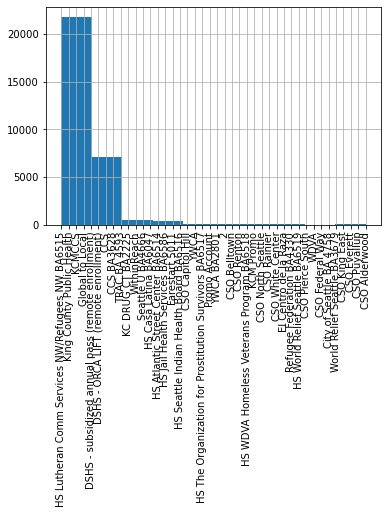

In [9]:
sap["CardIssuingAgency"].hist()
plt.xticks(rotation=90)
plt.show()

In [10]:
top5 = sap.value_counts("CardIssuingAgency").index[:5]
top5.tolist()

['King County Public Health',
 'DSHS - ORCA LIFT (remote enrollment)',
 'DSHS - subsidized annual pass (remote enrollment)',
 'CCS',
 'KCMCCS']

In [11]:
# Agency is the condensed version of CardIssuingAgency.
sap['Agency'] = (sap.CardIssuingAgency.
                          apply(lambda x: x 
                                if x in top5 
                                else "Other"))
sap

,Unnamed:_0,Age,RaceDesc,LanguageSpoken,Expiration,DateIssued,CardIssuingAgency,GEOID,Initial_Load,Study_Card,card_id,OverallJobAccess_D,lowwagelaborforce_D,Access30Transit_D,Access30Transit_ts_D,spatialmismatch_D,SAP,Agency
11,11,44,Hispanic or Latino,Spanish,10/31/2023,2021-10-21,HS Lutheran Comm Services NW/Refugees NW BA6515,530330288022,70.0,NaN,51694-3,4,3,1,1,2,0,Other
18,18,46,White,English,8/31/2023,2021-09-01,King County Public Health,530330288022,10.0,NaN,74266-2,4,3,1,1,2,0,King County Public Health
26,26,59,White,English,7/31/2023,2021-06-21,King County Public Health,530330288022,10.0,NaN,100890-3,4,3,1,1,2,0,King County Public Health
50,50,58,White,English,4/30/2023,2020-11-13,KCMCCS,530330288022,10.0,NaN,159642-2,4,3,1,1,2,0,KCMCCS
54,54,58,White,English,10/31/2022,2020-10-23,King County Public Health,530330288022,10.0,NaN,165186-2,4,3,1,1,2,0,King County Public Health
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112520,112520,39,White,English,10/31/2024,2022-02-14,King County Public Health,530530723056,NaN,Subsidized Annual Pass,270140-1,2,1,1,1,1,1,King County Public Health
112521,112521,40,White,English,11/30/2023,2022-02-17,DSHS - ORCA LIFT (remote enrollment),530530704041,10.0,NaN,270468-1,1,4,1,1,4,0,DSHS - ORCA LIFT (remote enrollment)
112522,112522,36,White,English,3/31/2025,2022-02-22,King County Public Health,530610417042,10.0,NaN,270632-1,3,4,3,3,4,0,King County Public Health
112523,112523,40,White,English,10/31/2024,2022-03-04,DSHS - subsidized annual pass (remote enrollment),530530723101,NaN,Subsidized Annual Pass,271502-1,2,2,4,3,2,1,DSHS - subsidized annual pass (remote enrollment)


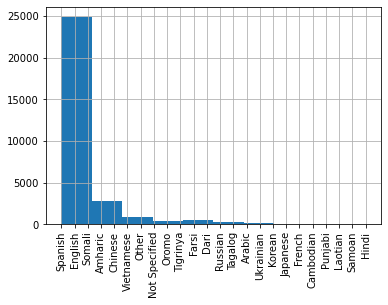

In [12]:
sap["LanguageSpoken"].hist()
plt.xticks(rotation=90)
plt.show()

In [13]:
sap["LanguageSpoken"].value_counts()

English          23190
Chinese           2546
Spanish           1582
Dari               423
Vietnamese         418
Other              401
Russian            228
Amharic            205
Not Specified      200
Tigrinya           134
Ukrainian           85
Somali              79
Farsi               67
Korean              66
French              48
Arabic              47
Tagalog             41
Cambodian           21
Oromo               15
Punjabi             13
Japanese             7
Hindi                5
Laotian              3
Samoan               3
Name: LanguageSpoken, dtype: int64

In [14]:
top10 = sap.value_counts("LanguageSpoken").index[:5]
top10.tolist()

['English', 'Chinese', 'Spanish', 'Dari', 'Vietnamese']

In [15]:
# Language is the condensed version of LanguageSpoken.
sap['Language'] = (sap.LanguageSpoken.
                          apply(lambda x: x 
                                if x in top10 
                                else "Other"))
sap

,Unnamed:_0,Age,RaceDesc,LanguageSpoken,Expiration,DateIssued,CardIssuingAgency,GEOID,Initial_Load,Study_Card,card_id,OverallJobAccess_D,lowwagelaborforce_D,Access30Transit_D,Access30Transit_ts_D,spatialmismatch_D,SAP,Agency,Language
11,11,44,Hispanic or Latino,Spanish,10/31/2023,2021-10-21,HS Lutheran Comm Services NW/Refugees NW BA6515,530330288022,70.0,NaN,51694-3,4,3,1,1,2,0,Other,Spanish
18,18,46,White,English,8/31/2023,2021-09-01,King County Public Health,530330288022,10.0,NaN,74266-2,4,3,1,1,2,0,King County Public Health,English
26,26,59,White,English,7/31/2023,2021-06-21,King County Public Health,530330288022,10.0,NaN,100890-3,4,3,1,1,2,0,King County Public Health,English
50,50,58,White,English,4/30/2023,2020-11-13,KCMCCS,530330288022,10.0,NaN,159642-2,4,3,1,1,2,0,KCMCCS,English
54,54,58,White,English,10/31/2022,2020-10-23,King County Public Health,530330288022,10.0,NaN,165186-2,4,3,1,1,2,0,King County Public Health,English
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112520,112520,39,White,English,10/31/2024,2022-02-14,King County Public Health,530530723056,NaN,Subsidized Annual Pass,270140-1,2,1,1,1,1,1,King County Public Health,English
112521,112521,40,White,English,11/30/2023,2022-02-17,DSHS - ORCA LIFT (remote enrollment),530530704041,10.0,NaN,270468-1,1,4,1,1,4,0,DSHS - ORCA LIFT (remote enrollment),English
112522,112522,36,White,English,3/31/2025,2022-02-22,King County Public Health,530610417042,10.0,NaN,270632-1,3,4,3,3,4,0,King County Public Health,English
112523,112523,40,White,English,10/31/2024,2022-03-04,DSHS - subsidized annual pass (remote enrollment),530530723101,NaN,Subsidized Annual Pass,271502-1,2,2,4,3,2,1,DSHS - subsidized annual pass (remote enrollment),English


In [16]:
# split into user id and card number
sap[['user_id', 'stage']] = sap['card_id'].str.split('-', expand=True)

In [17]:
# bin all continuous variables.
sap['Age_bin']=pd.cut(x = sap['Age'],
                        bins = [0,25,35,45,55,65,200], 
                        labels = [0,1,2,3,4,5])

# I use one hot encoding for features with more than one category (ie 'RaceDesc','LanguageSpoken', 'CardIssuingAgency')
prep_data = sap[['RaceDesc','Language']] # someone might register a second time at another Card Issuing Agency.
# prep_data
prep_data=pd.get_dummies(prep_data)
prep_data

# sap.drop(columns=['RaceDesc','LanguageSpoken', 'CardIssuingAgency'],inplace=True)

,RaceDesc_American Indian or Alaska Native,RaceDesc_Asian,RaceDesc_Black or African American,RaceDesc_Hispanic or Latino,RaceDesc_Multi-Racial,RaceDesc_Native Hawaiian or Other Pacific Islander,RaceDesc_Not Specified,RaceDesc_Other,RaceDesc_White,Language_Chinese,Language_Dari,Language_English,Language_Other,Language_Spanish,Language_Vietnamese
11,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
18,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
26,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
50,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
54,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112520,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
112521,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
112522,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
112523,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0


In [18]:
sap # 4.7: 29878 rows

,Unnamed:_0,Age,RaceDesc,LanguageSpoken,Expiration,DateIssued,CardIssuingAgency,GEOID,Initial_Load,Study_Card,...,lowwagelaborforce_D,Access30Transit_D,Access30Transit_ts_D,spatialmismatch_D,SAP,Agency,Language,user_id,stage,Age_bin
11,11,44,Hispanic or Latino,Spanish,10/31/2023,2021-10-21,HS Lutheran Comm Services NW/Refugees NW BA6515,530330288022,70.0,NaN,...,3,1,1,2,0,Other,Spanish,51694,3,2
18,18,46,White,English,8/31/2023,2021-09-01,King County Public Health,530330288022,10.0,NaN,...,3,1,1,2,0,King County Public Health,English,74266,2,3
26,26,59,White,English,7/31/2023,2021-06-21,King County Public Health,530330288022,10.0,NaN,...,3,1,1,2,0,King County Public Health,English,100890,3,4
50,50,58,White,English,4/30/2023,2020-11-13,KCMCCS,530330288022,10.0,NaN,...,3,1,1,2,0,KCMCCS,English,159642,2,4
54,54,58,White,English,10/31/2022,2020-10-23,King County Public Health,530330288022,10.0,NaN,...,3,1,1,2,0,King County Public Health,English,165186,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112520,112520,39,White,English,10/31/2024,2022-02-14,King County Public Health,530530723056,NaN,Subsidized Annual Pass,...,1,1,1,1,1,King County Public Health,English,270140,1,2
112521,112521,40,White,English,11/30/2023,2022-02-17,DSHS - ORCA LIFT (remote enrollment),530530704041,10.0,NaN,...,4,1,1,4,0,DSHS - ORCA LIFT (remote enrollment),English,270468,1,2
112522,112522,36,White,English,3/31/2025,2022-02-22,King County Public Health,530610417042,10.0,NaN,...,4,3,3,4,0,King County Public Health,English,270632,1,2
112523,112523,40,White,English,10/31/2024,2022-03-04,DSHS - subsidized annual pass (remote enrollment),530530723101,NaN,Subsidized Annual Pass,...,2,4,3,2,1,DSHS - subsidized annual pass (remote enrollment),English,271502,1,2


In [19]:
# join with one hot encodings for features with more than one category
# sap = sap.merge(prep_data,left_index=True, right_index=True,how='left')
# sap

In [20]:
sap.columns

Index(['Unnamed:_0', 'Age', 'RaceDesc', 'LanguageSpoken', 'Expiration',
       'DateIssued', 'CardIssuingAgency', 'GEOID', 'Initial_Load',
       'Study_Card', 'card_id', 'OverallJobAccess_D', 'lowwagelaborforce_D',
       'Access30Transit_D', 'Access30Transit_ts_D', 'spatialmismatch_D', 'SAP',
       'Agency', 'Language', 'user_id', 'stage', 'Age_bin'],
      dtype='object')

In [21]:
sap = sap.loc[:, ~sap.columns.isin(['Initial_Load', 'Study_Card', 'card_id','DateIssued','GEOID','Unnamed:_0','Expiration','LanguageSpoken','Age','CardIssuingAgency'])]
sap

,RaceDesc,OverallJobAccess_D,lowwagelaborforce_D,Access30Transit_D,Access30Transit_ts_D,spatialmismatch_D,SAP,Agency,Language,user_id,stage,Age_bin
11,Hispanic or Latino,4,3,1,1,2,0,Other,Spanish,51694,3,2
18,White,4,3,1,1,2,0,King County Public Health,English,74266,2,3
26,White,4,3,1,1,2,0,King County Public Health,English,100890,3,4
50,White,4,3,1,1,2,0,KCMCCS,English,159642,2,4
54,White,4,3,1,1,2,0,King County Public Health,English,165186,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...
112520,White,2,1,1,1,1,1,King County Public Health,English,270140,1,2
112521,White,1,4,1,1,4,0,DSHS - ORCA LIFT (remote enrollment),English,270468,1,2
112522,White,3,4,3,3,4,0,King County Public Health,English,270632,1,2
112523,White,2,2,4,3,2,1,DSHS - subsidized annual pass (remote enrollment),English,271502,1,2


In [22]:
sap["SAP"].value_counts()

0    18653
1    11225
Name: SAP, dtype: int64

In [23]:
11225/18653

0.6017798745510106

In [24]:
sap["stage"] = sap["stage"].astype(int)
count_enroll = sap.groupby(["user_id"]).count()[['stage']]
count_enroll = count_enroll.rename(columns={'stage': 'count_enroll'})

In [25]:
sap = sap.merge(count_enroll, on='user_id', how='left') # 117728 rows

sap_enrollment = sap.loc[:, ~sap.columns.isin(['stage'])]
sap_enrollment

,RaceDesc,OverallJobAccess_D,lowwagelaborforce_D,Access30Transit_D,Access30Transit_ts_D,spatialmismatch_D,SAP,Agency,Language,user_id,Age_bin,count_enroll
0,Hispanic or Latino,4,3,1,1,2,0,Other,Spanish,51694,2,1
1,White,4,3,1,1,2,0,King County Public Health,English,74266,3,1
2,White,4,3,1,1,2,0,King County Public Health,English,100890,4,1
3,White,4,3,1,1,2,0,KCMCCS,English,159642,4,1
4,White,4,3,1,1,2,0,King County Public Health,English,165186,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
29873,White,2,1,1,1,1,1,King County Public Health,English,270140,2,1
29874,White,1,4,1,1,4,0,DSHS - ORCA LIFT (remote enrollment),English,270468,2,1
29875,White,3,4,3,3,4,0,King County Public Health,English,270632,2,1
29876,White,2,2,4,3,2,1,DSHS - subsidized annual pass (remote enrollment),English,271502,2,1


In [26]:
sap_enrollment['count_enroll'] = sap_enrollment['count_enroll'].astype(int)

## EDA of Enrollment vs. Covariates

In [27]:
#RACE
race_plt =  sap_enrollment.groupby(['RaceDesc'],as_index=False).count_enroll.mean()
print(race_plt)
race_plt['RaceDesc'] = race_plt['RaceDesc'].astype(str)

                                    RaceDesc  count_enroll
0           American Indian or Alaska Native      1.281461
1                                      Asian      1.508305
2                  Black or African American      1.283484
3                         Hispanic or Latino      1.135192
4                               Multi-Racial      1.219638
5  Native Hawaiian or Other Pacific Islander      1.197674
6                              Not Specified      1.227073
7                                      Other      1.185230
8                                      White      1.230155


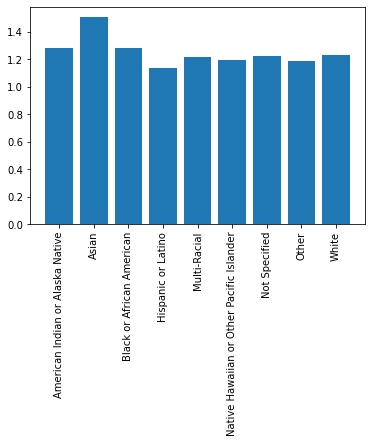

In [28]:
import matplotlib.pyplot as plt
plt.bar(race_plt["RaceDesc"], race_plt["count_enroll"], width=0.8, bottom=None, align='center')
plt.xticks(rotation=90)
plt.show()

In [29]:
#AGE
age_plt =  sap_enrollment.groupby(['Age_bin'],as_index=False).count_enroll.mean()
print(age_plt)
age_plt['Age_bin'] = age_plt['Age_bin'].astype(str)

  Age_bin  count_enroll
0       0      1.100024
1       1      1.152232
2       2      1.197168
3       3      1.288186
4       4      1.325796
5       5      1.692612


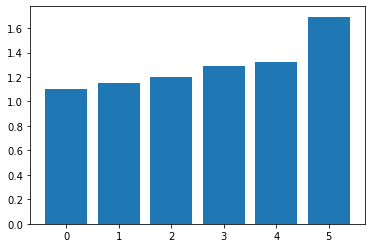

In [30]:
plt.bar(age_plt['Age_bin'], age_plt["count_enroll"], width=0.8, bottom=None, align='center', data=age_plt)
plt.show()

In [31]:
sap_enrollment

,RaceDesc,OverallJobAccess_D,lowwagelaborforce_D,Access30Transit_D,Access30Transit_ts_D,spatialmismatch_D,SAP,Agency,Language,user_id,Age_bin,count_enroll
0,Hispanic or Latino,4,3,1,1,2,0,Other,Spanish,51694,2,1
1,White,4,3,1,1,2,0,King County Public Health,English,74266,3,1
2,White,4,3,1,1,2,0,King County Public Health,English,100890,4,1
3,White,4,3,1,1,2,0,KCMCCS,English,159642,4,1
4,White,4,3,1,1,2,0,King County Public Health,English,165186,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
29873,White,2,1,1,1,1,1,King County Public Health,English,270140,2,1
29874,White,1,4,1,1,4,0,DSHS - ORCA LIFT (remote enrollment),English,270468,2,1
29875,White,3,4,3,3,4,0,King County Public Health,English,270632,2,1
29876,White,2,2,4,3,2,1,DSHS - subsidized annual pass (remote enrollment),English,271502,2,1


In [32]:
# Language
language_plt =  sap_enrollment.groupby(['Language'],as_index=False).count_enroll.mean()
# print(language_plt)

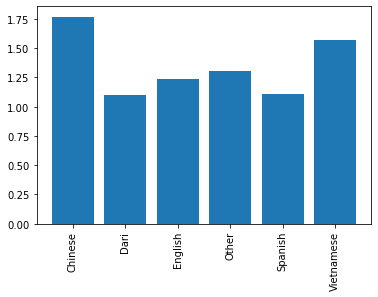

In [33]:
plt.bar(language_plt["Language"], language_plt["count_enroll"], width=0.8, bottom=None, align='center')
plt.xticks(rotation=90)
plt.show()

   spatialmismatch_D  count_enroll
0                  1      1.285155
1                  2      1.325722
2                  3      1.275297
3                  4      1.230540


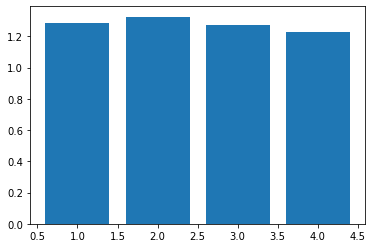

In [34]:
# Spatial Mismatch
sm_plt =  sap_enrollment.groupby(['spatialmismatch_D'],as_index=False).count_enroll.mean()
print(sm_plt)

plt.bar(sm_plt["spatialmismatch_D"], sm_plt["count_enroll"], width=0.8, bottom=None, align='center')
plt.show()

   Access30Transit_D  count_enroll
0                  1      1.163686
1                  2      1.214806
2                  3      1.236267
3                  4      1.333854


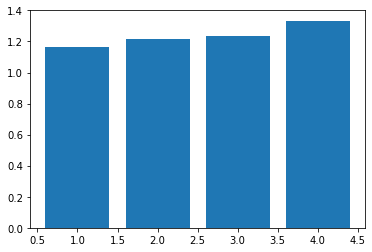

In [35]:
# access to transit
accesstransit_plt =  sap_enrollment.groupby(['Access30Transit_D'],as_index=False).count_enroll.mean()
print(accesstransit_plt)

plt.bar(accesstransit_plt["Access30Transit_D"], accesstransit_plt["count_enroll"], width=0.8, bottom=None, align='center')
plt.show()

   OverallJobAccess_D  count_enroll
0                   1      1.204683
1                   2      1.215106
2                   3      1.208903
3                   4      1.336403


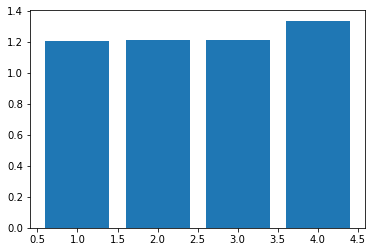

In [36]:
# Overall Job Access
ja_plt =  sap_enrollment.groupby(['OverallJobAccess_D'],as_index=False).count_enroll.mean()
print(ja_plt)
plt.bar(ja_plt["OverallJobAccess_D"], ja_plt["count_enroll"], width=0.8, bottom=None, align='center')
plt.show()

In [37]:
ds_general = sap_enrollment.loc[:, ~sap_enrollment.columns.isin(['FIPS','Age','DateIssued','Expiration'])]
ds_general

,RaceDesc,OverallJobAccess_D,lowwagelaborforce_D,Access30Transit_D,Access30Transit_ts_D,spatialmismatch_D,SAP,Agency,Language,user_id,Age_bin,count_enroll
0,Hispanic or Latino,4,3,1,1,2,0,Other,Spanish,51694,2,1
1,White,4,3,1,1,2,0,King County Public Health,English,74266,3,1
2,White,4,3,1,1,2,0,King County Public Health,English,100890,4,1
3,White,4,3,1,1,2,0,KCMCCS,English,159642,4,1
4,White,4,3,1,1,2,0,King County Public Health,English,165186,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
29873,White,2,1,1,1,1,1,King County Public Health,English,270140,2,1
29874,White,1,4,1,1,4,0,DSHS - ORCA LIFT (remote enrollment),English,270468,2,1
29875,White,3,4,3,3,4,0,King County Public Health,English,270632,2,1
29876,White,2,2,4,3,2,1,DSHS - subsidized annual pass (remote enrollment),English,271502,2,1


In [38]:
ds_general = ds_general.drop_duplicates()
ds_general # 27320 rows × 12 columns [27320 unique user_id's]

,RaceDesc,OverallJobAccess_D,lowwagelaborforce_D,Access30Transit_D,Access30Transit_ts_D,spatialmismatch_D,SAP,Agency,Language,user_id,Age_bin,count_enroll
0,Hispanic or Latino,4,3,1,1,2,0,Other,Spanish,51694,2,1
1,White,4,3,1,1,2,0,King County Public Health,English,74266,3,1
2,White,4,3,1,1,2,0,King County Public Health,English,100890,4,1
3,White,4,3,1,1,2,0,KCMCCS,English,159642,4,1
4,White,4,3,1,1,2,0,King County Public Health,English,165186,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
29873,White,2,1,1,1,1,1,King County Public Health,English,270140,2,1
29874,White,1,4,1,1,4,0,DSHS - ORCA LIFT (remote enrollment),English,270468,2,1
29875,White,3,4,3,3,4,0,King County Public Health,English,270632,2,1
29876,White,2,2,4,3,2,1,DSHS - subsidized annual pass (remote enrollment),English,271502,2,1


In [39]:
# There are 201 null values for bmi. We will drop these values in the cell below.
ds_general.isnull().sum() # 50 values in racedesc

RaceDesc                51
OverallJobAccess_D       0
lowwagelaborforce_D      0
Access30Transit_D        0
Access30Transit_ts_D     0
spatialmismatch_D        0
SAP                      0
Agency                   0
Language                 0
user_id                  0
Age_bin                  1
count_enroll             0
dtype: int64

In [40]:
# 1 value in Age_bin was NA.
ds_general = ds_general[ds_general['Age_bin'].notna()]
ds_general

,RaceDesc,OverallJobAccess_D,lowwagelaborforce_D,Access30Transit_D,Access30Transit_ts_D,spatialmismatch_D,SAP,Agency,Language,user_id,Age_bin,count_enroll
0,Hispanic or Latino,4,3,1,1,2,0,Other,Spanish,51694,2,1
1,White,4,3,1,1,2,0,King County Public Health,English,74266,3,1
2,White,4,3,1,1,2,0,King County Public Health,English,100890,4,1
3,White,4,3,1,1,2,0,KCMCCS,English,159642,4,1
4,White,4,3,1,1,2,0,King County Public Health,English,165186,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
29873,White,2,1,1,1,1,1,King County Public Health,English,270140,2,1
29874,White,1,4,1,1,4,0,DSHS - ORCA LIFT (remote enrollment),English,270468,2,1
29875,White,3,4,3,3,4,0,King County Public Health,English,270632,2,1
29876,White,2,2,4,3,2,1,DSHS - subsidized annual pass (remote enrollment),English,271502,2,1


In [41]:
# 50 value of RaceDesc NA
ds_general["RaceDesc"] = ds_general["RaceDesc"].fillna(value="Other")
ds_general

,RaceDesc,OverallJobAccess_D,lowwagelaborforce_D,Access30Transit_D,Access30Transit_ts_D,spatialmismatch_D,SAP,Agency,Language,user_id,Age_bin,count_enroll
0,Hispanic or Latino,4,3,1,1,2,0,Other,Spanish,51694,2,1
1,White,4,3,1,1,2,0,King County Public Health,English,74266,3,1
2,White,4,3,1,1,2,0,King County Public Health,English,100890,4,1
3,White,4,3,1,1,2,0,KCMCCS,English,159642,4,1
4,White,4,3,1,1,2,0,King County Public Health,English,165186,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
29873,White,2,1,1,1,1,1,King County Public Health,English,270140,2,1
29874,White,1,4,1,1,4,0,DSHS - ORCA LIFT (remote enrollment),English,270468,2,1
29875,White,3,4,3,3,4,0,King County Public Health,English,270632,2,1
29876,White,2,2,4,3,2,1,DSHS - subsidized annual pass (remote enrollment),English,271502,2,1


# Visualizing Count Enrollment

Text(0.5, 1.0, 'Reenrollment count (individuals in SAP)')

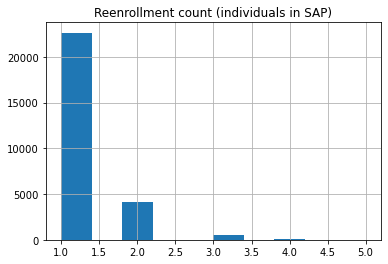

In [42]:
# loadings per week. We see outliers at 30-45
ds_general["count_enroll"].hist()
plt.title('Reenrollment count (individuals in SAP)')

Text(0.5, 1.0, 'Reenrollment count (individuals not in SAP)')

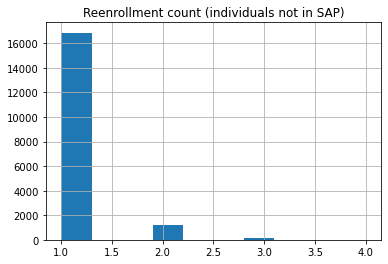

In [43]:
ds_general[(ds_general.SAP == 0)]["count_enroll"].hist()
plt.title('Reenrollment count (individuals not in SAP)')

<AxesSubplot:>

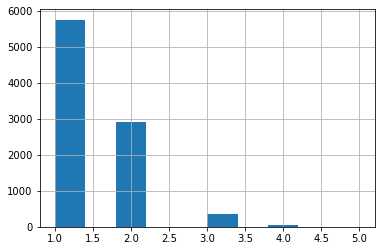

In [44]:
ds_general[(ds_general.SAP == 1)]["count_enroll"].hist()

<AxesSubplot:>

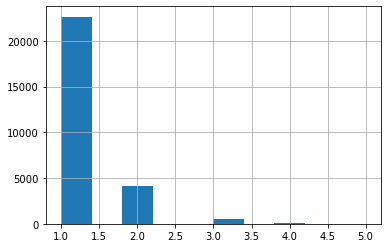

In [45]:
# loadings per week. We see outliers at 30-45
ds_general["count_enroll"].hist()

# FLAME

In [46]:
# Drop User_id for matching
match_all = ds_general.loc[:, ~ds_general.columns.isin(['user_id','Age'])]
match_all

,RaceDesc,OverallJobAccess_D,lowwagelaborforce_D,Access30Transit_D,Access30Transit_ts_D,spatialmismatch_D,SAP,Agency,Language,Age_bin,count_enroll
0,Hispanic or Latino,4,3,1,1,2,0,Other,Spanish,2,1
1,White,4,3,1,1,2,0,King County Public Health,English,3,1
2,White,4,3,1,1,2,0,King County Public Health,English,4,1
3,White,4,3,1,1,2,0,KCMCCS,English,4,1
4,White,4,3,1,1,2,0,King County Public Health,English,4,1
...,...,...,...,...,...,...,...,...,...,...,...
29873,White,2,1,1,1,1,1,King County Public Health,English,2,1
29874,White,1,4,1,1,4,0,DSHS - ORCA LIFT (remote enrollment),English,2,1
29875,White,3,4,3,3,4,0,King County Public Health,English,2,1
29876,White,2,2,4,3,2,1,DSHS - subsidized annual pass (remote enrollment),English,2,1


In [47]:
match_all.RaceDesc.value_counts()

White                                        9278
Black or African American                    5524
Asian                                        4226
Hispanic or Latino                           2731
Not Specified                                2547
Other                                        1619
American Indian or Alaska Native              708
Multi-Racial                                  360
Native Hawaiian or Other Pacific Islander     326
Name: RaceDesc, dtype: int64

In [48]:
# Map all string categorical variables to numbers.
race = {"White": 0, "Black or African American": 1, "Asian": 2, "Hispanic or Latino": 3, "Not Specified": 4, 'Other': 5, 'American Indian or Alaska Native': 6, "Multi-Racial": 7, "Native Hawaiian or Other Pacific Islander": 8}
match_all['RaceDesc'] = match_all['RaceDesc'].map(race)
match_all
# df_trunc['rf_phyp'] = df_trunc['rf_phyp'].map(d)

,RaceDesc,OverallJobAccess_D,lowwagelaborforce_D,Access30Transit_D,Access30Transit_ts_D,spatialmismatch_D,SAP,Agency,Language,Age_bin,count_enroll
0,3,4,3,1,1,2,0,Other,Spanish,2,1
1,0,4,3,1,1,2,0,King County Public Health,English,3,1
2,0,4,3,1,1,2,0,King County Public Health,English,4,1
3,0,4,3,1,1,2,0,KCMCCS,English,4,1
4,0,4,3,1,1,2,0,King County Public Health,English,4,1
...,...,...,...,...,...,...,...,...,...,...,...
29873,0,2,1,1,1,1,1,King County Public Health,English,2,1
29874,0,1,4,1,1,4,0,DSHS - ORCA LIFT (remote enrollment),English,2,1
29875,0,3,4,3,3,4,0,King County Public Health,English,2,1
29876,0,2,2,4,3,2,1,DSHS - subsidized annual pass (remote enrollment),English,2,1


In [49]:
language = {"English": 0, "Chinese": 1, "Spanish": 2, "Dari": 3, "Vietnamese": 4, 'Other': 5}
match_all['Language'] = match_all['Language'].map(language)
match_all

,RaceDesc,OverallJobAccess_D,lowwagelaborforce_D,Access30Transit_D,Access30Transit_ts_D,spatialmismatch_D,SAP,Agency,Language,Age_bin,count_enroll
0,3,4,3,1,1,2,0,Other,2,2,1
1,0,4,3,1,1,2,0,King County Public Health,0,3,1
2,0,4,3,1,1,2,0,King County Public Health,0,4,1
3,0,4,3,1,1,2,0,KCMCCS,0,4,1
4,0,4,3,1,1,2,0,King County Public Health,0,4,1
...,...,...,...,...,...,...,...,...,...,...,...
29873,0,2,1,1,1,1,1,King County Public Health,0,2,1
29874,0,1,4,1,1,4,0,DSHS - ORCA LIFT (remote enrollment),0,2,1
29875,0,3,4,3,3,4,0,King County Public Health,0,2,1
29876,0,2,2,4,3,2,1,DSHS - subsidized annual pass (remote enrollment),0,2,1


In [50]:
a = {"King County Public Health": 0, "DSHS - ORCA LIFT (remote enrollment)": 1, "DSHS - subsidized annual pass (remote enrollment)": 2, "CCS": 3, "KCMCCS": 4, 'Other': 5}
match_all['Agency'] = match_all['Agency'].map(a)
match_all

,RaceDesc,OverallJobAccess_D,lowwagelaborforce_D,Access30Transit_D,Access30Transit_ts_D,spatialmismatch_D,SAP,Agency,Language,Age_bin,count_enroll
0,3,4,3,1,1,2,0,5,2,2,1
1,0,4,3,1,1,2,0,0,0,3,1
2,0,4,3,1,1,2,0,0,0,4,1
3,0,4,3,1,1,2,0,4,0,4,1
4,0,4,3,1,1,2,0,0,0,4,1
...,...,...,...,...,...,...,...,...,...,...,...
29873,0,2,1,1,1,1,1,0,0,2,1
29874,0,1,4,1,1,4,0,1,0,2,1
29875,0,3,4,3,3,4,0,0,0,2,1
29876,0,2,2,4,3,2,1,2,0,2,1


In [51]:
# flame is faster but dame considers more covariate sets. stopping upon matching all t'ed units.
model_flame_AMT = dame_flame.matching.FLAME(repeats=False, verbose=3, early_stop_iterations=30, stop_unmatched_t = True, adaptive_weights='decisiontree', want_pe=True)

# binned language (many small languages were put into one category).
# changed race and language from 1 hot encodings into categorical variables.
# used decision tree for covariate importance.
# ended matching on completion of t.


In [52]:
model_flame_AMT.fit(holdout_data=False, treatment_column_name='SAP', outcome_column_name='count_enroll')
result_flame_AMT = model_flame_AMT.predict(match_all)

Iteration number:  1
	Number of matched groups formed in total:  1166
	Unmatched treated units:  5187 out of a total of  9068 treated units
	Unmatched control units:  13002 out of a total of  18251 control units
	Predictive error of covariates chosen this iteration:  0
	Number of matches made in this iteration:  9130
	Number of matches made so far:  9130
	In this iteration, the covariates dropped are:  set()
Iteration number:  2
	Number of matched groups formed in total:  2492
	Unmatched treated units:  2293 out of a total of  9068 treated units
	Unmatched control units:  8282 out of a total of  18251 control units
	Predictive error of covariates chosen this iteration:  0.13803577655037072
	Number of matches made in this iteration:  7614
	Number of matches made so far:  16744
	In this iteration, the covariates dropped are:  Agency
Iteration number:  3
	Number of matched groups formed in total:  2792
	Unmatched treated units:  1874 out of a total of  9068 treated units
	Unmatched contro

In [53]:
# bin variables into larger categories.
# check which variables were matched on.
# show the exact matched groups to organizers (figure.) Number of data points in matched group (vs. treatment effect.)
# Pick out specific matched groups to show (and count of n in match group.)

In [54]:
# ATE Overall.
ate_AMT = dame_flame.utils.post_processing.ATE(model_flame_AMT)
ate_AMT # 0.289

0.2589008954350527

In [55]:
# For each unit, we can see the covariates it was matched on.
matched = model_flame_AMT.df_units_and_covars_matched
matched

,RaceDesc,OverallJobAccess_D,lowwagelaborforce_D,Access30Transit_D,Access30Transit_ts_D,spatialmismatch_D,Agency,Language,Age_bin
1,0,4,3,1,1,2,0,0,3
2,0,4,3,1,*,2,*,0,*
3,0,4,3,1,*,2,*,0,*
4,0,4,3,1,*,2,*,0,*
8,3,4,3,1,1,2,*,0,1
...,...,...,...,...,...,...,...,...,...
29873,0,2,1,1,1,1,0,0,2
29874,0,1,4,1,1,4,*,0,2
29875,0,3,4,3,3,4,0,0,2
29876,0,2,2,4,*,2,*,0,2


# Compute Cates
Date: 4-15-2022

In [56]:
def compute_cates(column_name: str) -> dict:
    """
    Return dictionary where
    - the dictionary keys are a value in a column (i.e. Asian) and 
    - the dictionary value are the CATEs for all the units that have that value in the column (i.e. race=Asian) 
    """
    cates = {}
    cates_avg = {}
    for val in set(matched[column_name].tolist()):
        cates[val] = []
        print(f'Calculating cates for column: {column_name}, for value: {val}')
        for i in matched[(matched[column_name] == val)].index:
            cates[val].append(dame_flame.utils.post_processing.CATE(model_flame_AMT, i))
        cates_avg[val] = sum(cates[val]) / len(cates[val])
    return cates_avg

def get_cates_and_counts(column_name: str) -> pd.DataFrame:
    """
    Return pd DataFrame with CATE values and Count Values to plot both
    
    - 'CATE' column has CATE value corresponding to all the units with that value in the column
    - 'Counts' column has the number of all units in the data that are matched to a group that 
    has that specific value, i.e. 1791 individuals/units with matched in a group such that race=White
    """
    cates_avg = compute_cates(column_name)
    cates_avg_series = pd.Series(cates_avg)
    
    num_lvls = matched[column_name].value_counts()
    frame = {'CATE': cates_avg_series, 
             'Counts': num_lvls}
    data = pd.DataFrame(frame)
    data.index = data.index.map(str)
    data = data.sort_index() 
    return data


cols = ['RaceDesc', 'OverallJobAccess_D', 'lowwagelaborforce_D', 'Access30Transit_D', 'spatialmismatch_D']

df_dic = {}

def export_cate_df(cols: list): 
    """
    Create dictionary where
    - keys are column (i.e. White)
    - values are pandas dataframe (i.e. pandas dataframe created using get_cates_and_counts() that shows CATE
    values and counts)
    """
    for col in cols:
        df_dic[col] = get_cates_and_counts(col)

export_cate_df(cols)


Calculating cates for column: RaceDesc, for value: 0
Calculating cates for column: RaceDesc, for value: 1
Calculating cates for column: RaceDesc, for value: 2
Calculating cates for column: RaceDesc, for value: 3
Calculating cates for column: RaceDesc, for value: 4
Calculating cates for column: RaceDesc, for value: 5
Calculating cates for column: RaceDesc, for value: 6
Calculating cates for column: RaceDesc, for value: 7
Calculating cates for column: RaceDesc, for value: 8
Calculating cates for column: RaceDesc, for value: *
Calculating cates for column: OverallJobAccess_D, for value: 1
Calculating cates for column: OverallJobAccess_D, for value: 2
Calculating cates for column: OverallJobAccess_D, for value: 3
Calculating cates for column: OverallJobAccess_D, for value: 4
Calculating cates for column: lowwagelaborforce_D, for value: 1
Calculating cates for column: lowwagelaborforce_D, for value: 2
Calculating cates for column: lowwagelaborforce_D, for value: 3
Calculating cates for colu

In [57]:
import seaborn as sns

# set this file path to whereever you want to save graphs
artifacts_filepath = '/Users/albertsun/Projects/artifacts/'

sns.set_theme()
sns.set(font_scale=2)
plt.rcParams['figure.figsize'] = [15, 12]

### Plot Race CATE for SAP reenrollment
4/15/2022

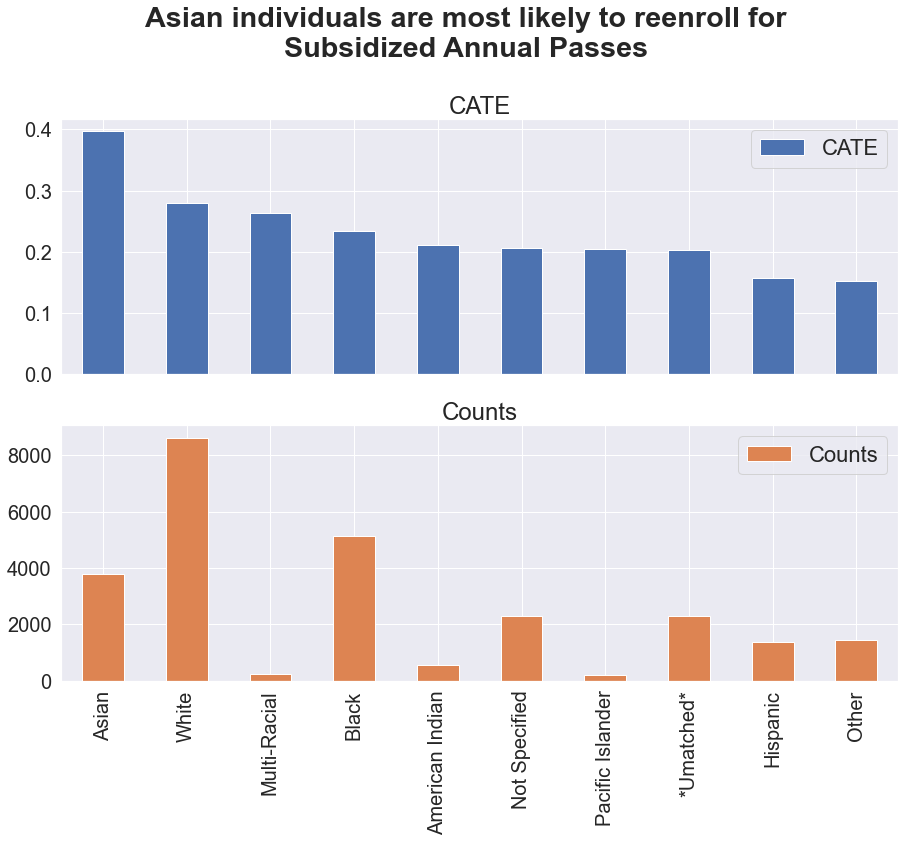

In [58]:
# Plot Race
df_race = df_dic['RaceDesc']
df_race = df_race.rename(index={'0': 'White',
                                '1': 'Black',
                                '2': 'Asian',
                                '3': 'Hispanic',
                                '4': 'Not Specified',
                                '5': 'Other',
                                '6': 'American Indian',
                                '7': 'Multi-Racial',
                                '8': 'Pacific Islander',
                                '*': '*Umatched*'})

df_race.sort_values('CATE', ascending=False).plot.bar(rot=0, subplots=True, fontsize = 20)

plt.subplots_adjust(top=0.85)
plt.gcf().subplots_adjust(bottom=0.20)

plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 45-degrees
plt.suptitle('Asian individuals are most likely to reenroll for\nSubsidized Annual Passes', 
             fontweight='bold',)
            #x=0.1, y=.95, horizontalalignment='left')

plt.savefig(artifacts_filepath + 'ReenrollmentCATE_Race.png')

### Plot CATE for SAP reenrollment for any column function
4/15/2022

In [59]:
def plot_column_CATE(column: str, title: str, xaxistitle: str) -> None:
    """
    Generalized function that plots the CATE and counts for everything in a particular column, i.e. 
    "race". Must run previous helper functions for this to work. 
    
    Takes:
    - column - column name
    - title - plot title
    - xaxistitle - x axis title 
    
    Returns:
    - None
    
    """
    df_access = df_dic[column]

    df_access.sort_values('CATE', ascending=False).plot.bar(rot=0, subplots=True, fontsize = 20)
    
    plt.xlabel(xaxistitle)
    
    plt.subplots_adjust(top=0.85)
    plt.gcf().subplots_adjust(bottom=0.20)

    plt.suptitle(title, fontweight='bold')

    plt.savefig(artifacts_filepath + 'ReenrollmentCATE_' + column + '.png')

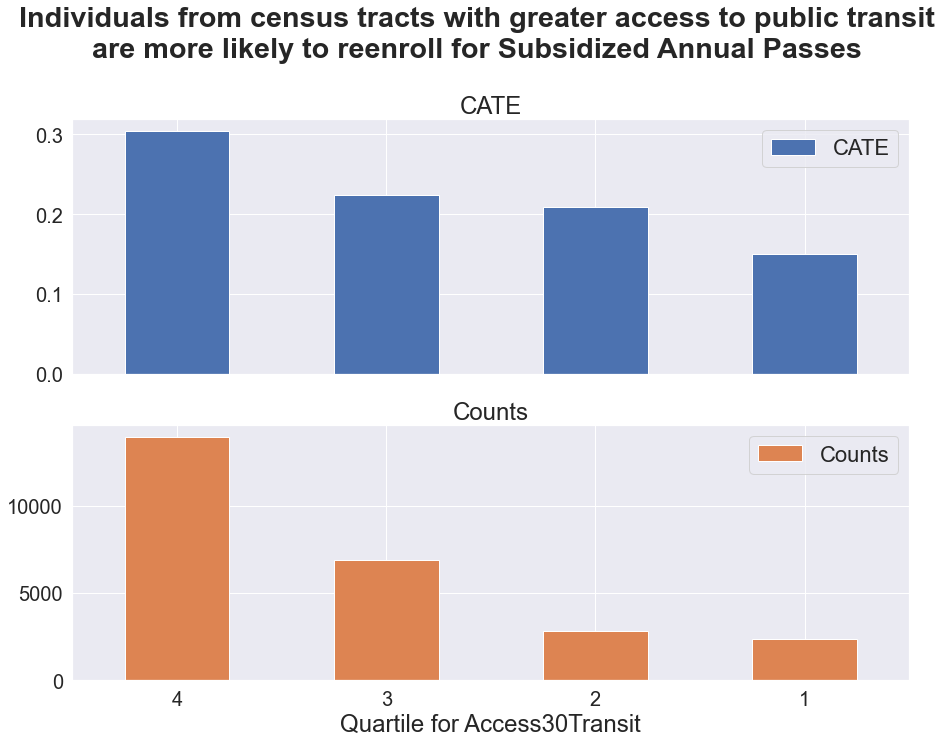

In [60]:
plot_column_CATE('Access30Transit_D', 
             'Individuals from census tracts with greater access to public transit\nare more likely to reenroll for Subsidized Annual Passes', 
                'Quartile for Access30Transit')

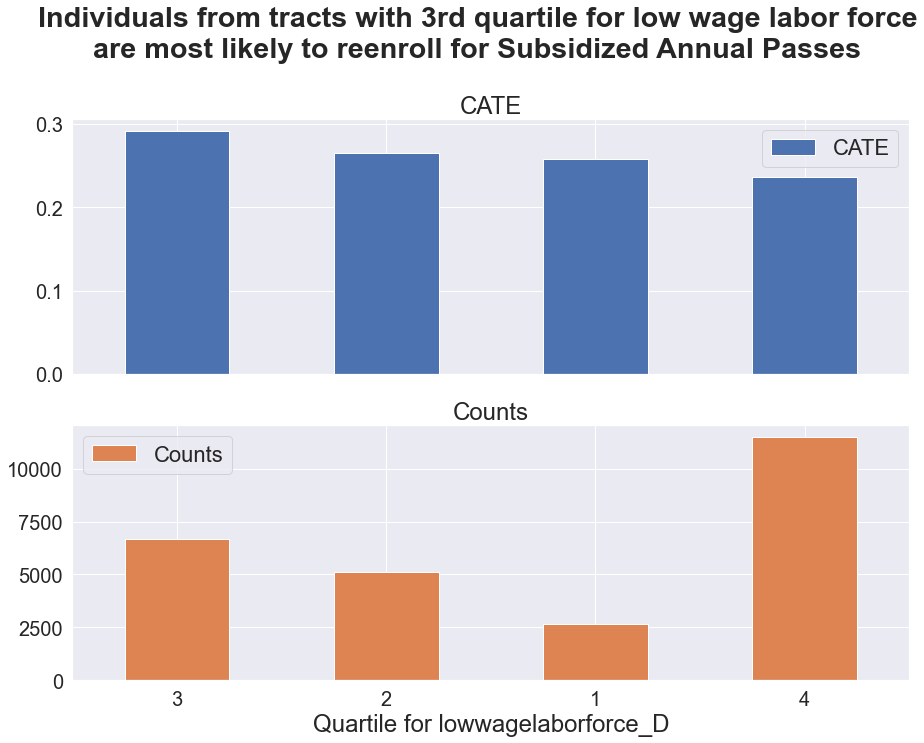

In [61]:
plot_column_CATE('lowwagelaborforce_D', 
             'Individuals from tracts with 3rd quartile for low wage labor force\nare most likely to reenroll for Subsidized Annual Passes', 
                'Quartile for lowwagelaborforce_D')

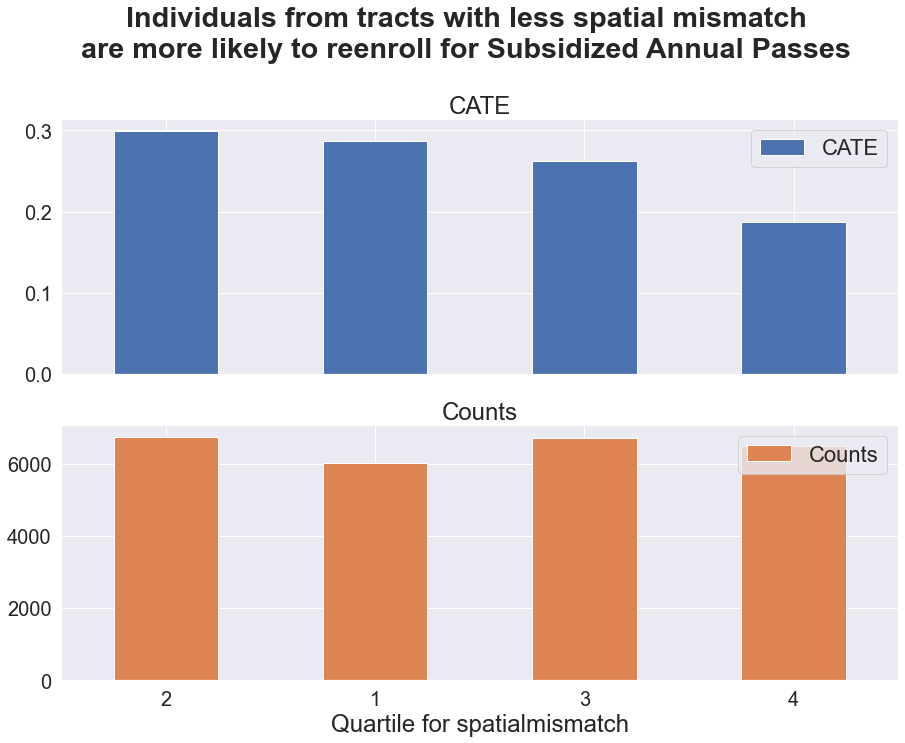

In [62]:
plot_column_CATE('spatialmismatch_D', 
             'Individuals from tracts with less spatial mismatch\nare more likely to reenroll for Subsidized Annual Passes', 
                'Quartile for spatialmismatch')




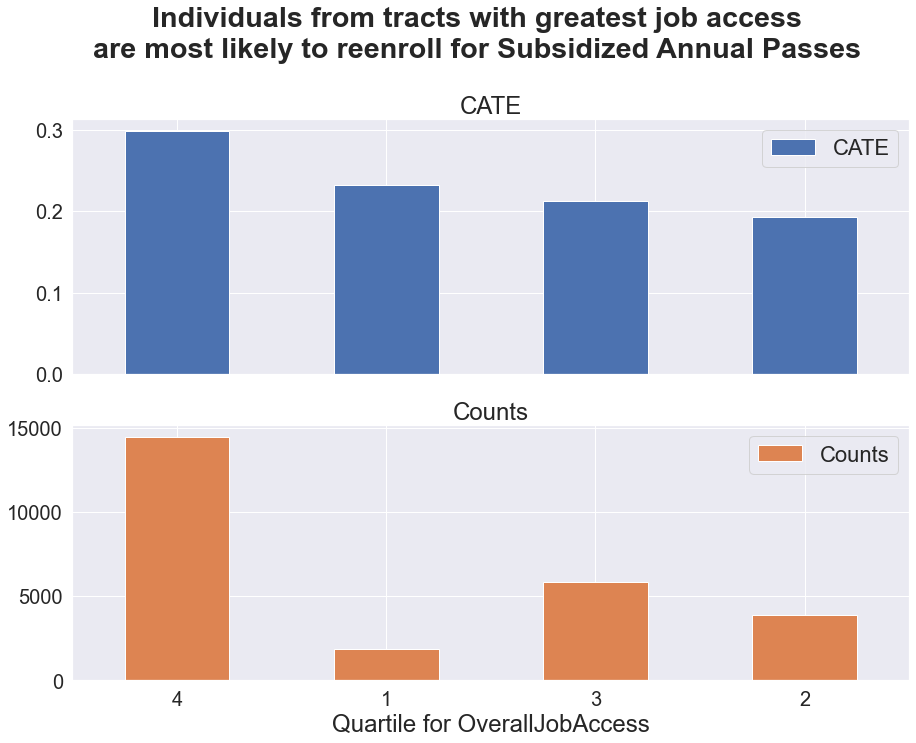

In [63]:
plot_column_CATE('OverallJobAccess_D', 
             'Individuals from tracts with greatest job access\nare most likely to reenroll for Subsidized Annual Passes', 
                'Quartile for OverallJobAccess')




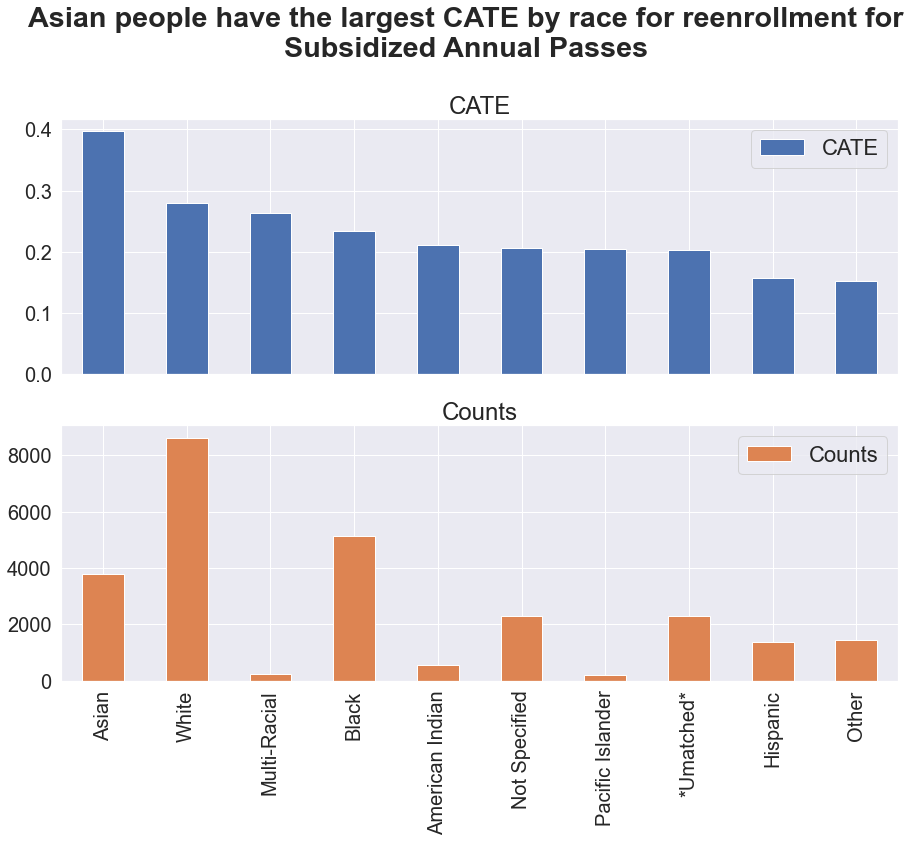

In [64]:
import seaborn as sns

artifacts_filepath = '/Users/albertsun/Projects/artifacts/'

sns.set_theme()
sns.set(font_scale=2)
plt.rcParams['figure.figsize'] = [15, 12]
#plt.rcParams.update({'font.size': 22})

df_race = df_dic['RaceDesc']
df_race = df_race.rename(index={'0': 'White',
                                '1': 'Black',
                                '2': 'Asian',
                                '3': 'Hispanic',
                                '4': 'Not Specified',
                                '5': 'Other',
                                '6': 'American Indian',
                                '7': 'Multi-Racial',
                                '8': 'Pacific Islander',
                                '*': '*Umatched*'})

df_race.sort_values('CATE', ascending=False).plot.bar(rot=0, subplots=True, fontsize = 20)

plt.subplots_adjust(top=0.85)
plt.gcf().subplots_adjust(bottom=0.20)

plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 45-degrees
plt.suptitle('Asian people have the largest CATE by race for reenrollment for\nSubsidized Annual Passes', 
             fontweight='bold',)
            #x=0.1, y=.95, horizontalalignment='left')

plt.savefig(artifacts_filepath + 'ReenrollmentCATE_Race.png')

## CATE based on RACE.

In [65]:
race = match_all.loc[:, match_all.columns.isin(['user_id','SAP','count_enroll','amt_total','RaceDesc_American Indian or Alaska Native', 'RaceDesc_Asian', 'RaceDesc_Black or African American','RaceDesc_Hispanic or Latino','RaceDesc_Multi-Racial','RaceDesc_Native Hawaiian or Other Pacific Islander', 'RaceDesc_None', 'RaceDesc_Not Specified', 'RaceDesc_Other', 'RaceDesc_White'])]
race

,SAP,count_enroll
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
29873,1,1
29874,0,1
29875,0,1
29876,1,1


In [66]:
model_flame_race = dame_flame.matching.FLAME(repeats=True, verbose=3, early_stop_iterations=30,adaptive_weights='ridge', alpha=0.1, want_pe=True)

model_flame_race.fit(holdout_data=False, treatment_column_name='SAP', outcome_column_name='count_enroll')

result_race = model_flame_race.predict(race)

ValueError: not enough values to unpack (expected 2, got 0)

In [ ]:
# For each unit, we can see the covariates it was matched on.
model_flame_race.df_units_and_covars_matched[:10]

In [ ]:
groups = list(range(len(model_flame_race.units_per_group)))
cate_of_group = []
len_group = []
for group in model_flame_race.units_per_group:
    cate_of_group.append(dame_flame.utils.post_processing.CATE(model_flame_race, group[0]))
    len_group.append(len(group))

In [ ]:
# model_flame_race.units_per_group
# insight into match groups below

[g[0] for g in model_flame_race.units_per_group]

In [ ]:
f, ax = plt.subplots(1, 2, gridspec_kw = {'width_ratios':[1, 1]}, figsize=(12,4))
ax[0].set_ylabel('Treatment Effect', fontsize=14)
ax[0].set_xlabel('Matched group ID number', fontsize=14)
ax[0].set_title('Treatment Effect by Race', fontsize=14)
ax[0].bar(groups,cate_of_group)

ax[1].set_ylabel('Number of Units in Group', fontsize=14) # each unit is a sale purchase
ax[1].set_xlabel('Matched group ID number', fontsize=14)
ax[1].set_title('Size of Each Group', fontsize=14)
ax[1].bar(groups,len_group)

plt.tight_layout()

## CATE based on OverallJobAccess_D

In [ ]:
job_access = match_all.loc[:, match_all.columns.isin(['user_id','SAP','count_enroll','OverallJobAccess_D'])]
job_access

In [ ]:
model_flame_ja = dame_flame.matching.FLAME(repeats=True, verbose=3, early_stop_iterations=30,adaptive_weights='ridge', alpha=0.1, want_pe=True)

model_flame_ja.fit(holdout_data=False, treatment_column_name='SAP', outcome_column_name='count_enroll')

result_jobaccess = model_flame_ja.predict(job_access)


In [ ]:
# model_flame_race.units_per_group
# insight into match groups below

[g[0] for g in model_flame_ja.units_per_group]

In [ ]:
# For each unit, we can see the covariates it was matched on.
model_flame_ja.df_units_and_covars_matched[:15]

In [ ]:
groups = list(range(len(model_flame_ja.units_per_group)))
cate_of_group = []
len_group = []
for group in model_flame_ja.units_per_group:
    cate_of_group.append(dame_flame.utils.post_processing.CATE(model_flame_ja, group[0]))
    len_group.append(len(group))

In [ ]:
f, ax = plt.subplots(1, 2, gridspec_kw = {'width_ratios':[1, 1]}, figsize=(12,4))
ax[0].set_ylabel('Treatment Effect', fontsize=14)
ax[0].set_xlabel('Matched group ID number', fontsize=14)
ax[0].set_title('Treatment Effect by Job Access', fontsize=14)
ax[0].bar(groups,cate_of_group)

ax[1].set_ylabel('Number of Units in Group', fontsize=14) # each unit is a sale purchase
ax[1].set_xlabel('Matched group ID number', fontsize=14)
ax[1].set_title('Size of Each Group', fontsize=14)
ax[1].bar(groups,len_group)

plt.tight_layout()

## CATE Based on Access30_Transit

In [ ]:
access30_transit = match_all.loc[:, match_all.columns.isin(['user_id','SAP','count_enroll','Access30Transit_D'])]
access30_transit

In [ ]:
model_flame_30 = dame_flame.matching.FLAME(repeats=True, verbose=3, early_stop_iterations=30,adaptive_weights='ridge', alpha=0.1, want_pe=True)

model_flame_30.fit(holdout_data=False, treatment_column_name='SAP', outcome_column_name='count_enroll')

result_jobaccess = model_flame_30.predict(access30_transit)


In [ ]:
# model_flame_race.units_per_group
# insight into match groups below

[g[0] for g in model_flame_30.units_per_group]

In [ ]:
# For each unit, we can see the covariates it was matched on.
model_flame_30.df_units_and_covars_matched[:15]

In [ ]:
groups = list(range(len(model_flame_30.units_per_group)))
cate_of_group = []
len_group = []
for group in model_flame_30.units_per_group:
    cate_of_group.append(dame_flame.utils.post_processing.CATE(model_flame_30, group[0]))
    len_group.append(len(group))

In [ ]:
f, ax = plt.subplots(1, 2, gridspec_kw = {'width_ratios':[1, 1]}, figsize=(12,4))
ax[0].set_ylabel('Treatment Effect', fontsize=14)
ax[0].set_xlabel('Matched group ID number', fontsize=14)
ax[0].set_title('Treatment Effect by Access to Transit', fontsize=14)
ax[0].bar(groups,cate_of_group)

ax[1].set_ylabel('Number of Units in Group', fontsize=14) # each unit is a sale purchase
ax[1].set_xlabel('Matched group ID number', fontsize=14)
ax[1].set_title('Size of Each Group', fontsize=14)
ax[1].bar(groups,len_group)

plt.tight_layout()

## CATE Based on Spatial Mismatch

In [ ]:
sm = match_all.loc[:, match_all.columns.isin(['user_id','SAP','count_enroll','spatialmismatch_D'])]
sm

In [ ]:
model_flame_mismatch = dame_flame.matching.FLAME(repeats=True, verbose=3, early_stop_iterations=30,adaptive_weights='ridge', alpha=0.1, want_pe=True)

model_flame_mismatch.fit(holdout_data=False, treatment_column_name='SAP', outcome_column_name='count_enroll')

result_mismatch = model_flame_mismatch.predict(sm)


In [ ]:
# model_flame_race.units_per_group
# insight into match groups below

[g[0] for g in model_flame_mismatch.units_per_group]

In [ ]:
groups = list(range(len(model_flame_mismatch.units_per_group)))
cate_of_group = []
len_group = []
for group in model_flame_mismatch.units_per_group:
    cate_of_group.append(dame_flame.utils.post_processing.CATE(model_flame_mismatch, group[0]))
    len_group.append(len(group))

In [ ]:
f, ax = plt.subplots(1, 2, gridspec_kw = {'width_ratios':[1, 1]}, figsize=(12,4))
ax[0].set_ylabel('Treatment Effect', fontsize=14)
ax[0].set_xlabel('Matched group ID number', fontsize=14)
ax[0].set_title('Treatment Effect by Spatial Mismatch', fontsize=14)
ax[0].bar(groups,cate_of_group)

ax[1].set_ylabel('Number of Units in Group', fontsize=14) # each unit is a sale purchase
ax[1].set_xlabel('Matched group ID number', fontsize=14)
ax[1].set_title('Size of Each Group', fontsize=14)
ax[1].bar(groups,len_group)

plt.tight_layout() # Note, spatial mismatch has nothing to do with money.

## CATE Based on lowwage labor force

In [ ]:
labor_force = match_all.loc[:, match_all.columns.isin(['user_id','SAP','count_enroll','spatialmismatch_D'])]
labor_force

In [ ]:
model_flame_labor = dame_flame.matching.FLAME(repeats=True, verbose=3, early_stop_iterations=30,adaptive_weights='ridge', alpha=0.1, want_pe=True)

model_flame_labor.fit(holdout_data=False, treatment_column_name='SAP', outcome_column_name='count_enroll')

result_labor = model_flame_mismatch.predict(labor_force)


In [ ]:
groups = list(range(len(model_flame_mismatch.units_per_group)))
cate_of_group = []
len_group = []
for group in model_flame_mismatch.units_per_group:
    cate_of_group.append(dame_flame.utils.post_processing.CATE(model_flame_mismatch, group[0]))
    len_group.append(len(group))

groups = list(range(len(model_flame_labor.units_per_group)))
cate_of_group = []
len_group = []
for group in model_flame_labor.units_per_group:
    cate_of_group.append(dame_flame.utils.post_processing.CATE(model_flame_labor, group[0]))
    len_group.append(len(group))

In [ ]:
f, ax = plt.subplots(1, 2, gridspec_kw = {'width_ratios':[1, 1]}, figsize=(12,4))
ax[0].set_ylabel('Treatment Effect', fontsize=14)
ax[0].set_xlabel('Matched group ID number', fontsize=14)
ax[0].set_title('Treatment Effect by Low Wage Labor Force', fontsize=14)
ax[0].bar(groups,cate_of_group)

ax[1].set_ylabel('Number of Units in Group', fontsize=14) # each unit is a sale purchase
ax[1].set_xlabel('Matched group ID number', fontsize=14)
ax[1].set_title('Size of Each Group', fontsize=14)
ax[1].bar(groups,len_group)

plt.tight_layout()

In [ ]:
###

In [ ]:
# we will examine sales on a user_id rather than card_id level (ie. dropping the final number in the card, "stage").
sap_nostage = sap.loc[:, ~sap.columns.isin(['stage','card_id'])]
sap_nostage

In [ ]:
sap_nostage.drop_duplicates() # no duplicates user_id, stage 1, stage 2 
# (which makes sense because they would not have registered 2x within this period.)

In [ ]:
# Combine the Response-variable (sales) with the features (registry).
LIFT_s = pd.read_csv("/Users/JennyH/cisil-causal-inference/Data/LIFT_sales.csv")
LIFT_s_cont = pd.read_csv("/Users/JennyH/cisil-causal-inference/Data/LIFT_sales_2021-11-01_to_2022-03-06.csv")

In [ ]:
LIFT_s # 585230 rows (ends: 2021-10-31)

In [ ]:
LIFT_s_cont # 27725 rows (dates: 11/1/2021 - 3/06/2022)

In [ ]:
LIFT_s = LIFT_s.append(LIFT_s_cont, ignore_index=True) # 612955 rows

In [ ]:
LIFT_s_afterp1 = LIFT_s[(LIFT_s.week >= "2020-01-01")]
LIFT_s_afterp1 # 159339 rows

In [ ]:
# split into user id and card number
LIFT_s_afterp1[['user_id', 'stage']] = LIFT_s_afterp1['card_id'].str.split('-', expand=True)

In [ ]:
LIFT_s_afterp1

In [ ]:
# aggregate to the user_id level
LIFT_s_afterp1_nostage = LIFT_s_afterp1.loc[:, ~LIFT_s_afterp1.columns.isin(['stage','card_id'])]
LIFT_s_afterp1_nostage

In [ ]:
# this is registry and sales information where each row corresponds to a (user, week, Amount).
sap_TA_loadings = sap_nostage.merge(LIFT_s_afterp1_nostage, on='user_id', how='left')
sap_TA_loadings # 2567 rows

# (LATER) Bin the FIPS into 5 different regions which make sense.

In [ ]:
sap_TA_loadings.columns # (LATER: different demographics linked to same user_id?)

In [ ]:
# loadings per week. We see outliers at 30-45
sap_TA_loadings["loadings"].hist()

In [ ]:
# distribution of Amount per week. We see outliers at 700
sap_TA_loadings["Amount"].hist()

In [ ]:
# We impute a a '0' in amount for people who never purchased after phase 1.
sap_TA_loadings['loadings'] = sap_TA_loadings['loadings'].replace(np.nan, 0)
sap_TA_loadings['Amount'] = sap_TA_loadings['Amount'].replace(np.nan, 0)
sap_TA_loadings['week'] = sap_TA_loadings['week'].replace(np.nan, "Never")
sap_TA_loadings

In [ ]:
sap_TA_loadings[(sap_TA_loadings.Amount == 0)] # 1160 users made 0 purchases.

In [ ]:
# 1397 unique user_ids in the df.
len(sap_TA_loadings["user_id"].unique())

In [ ]:
# aggregate by user-id (1397 unique user_ids, summing amount)
total_amount = phase1_TA_loadings.groupby('user_id').agg({'Amount': ['sum']}) # 1397 rows
total_amount # the total amount column is the amount for each user_id (summed over all cards and purchases.)

In [ ]:
phase1_TA_agg = phase1_TA_loadings.merge(total_amount, on='user_id', how='left')
phase1_TA_agg # 2567 rows

In [ ]:
phase1_TA_agg['Amount','sum']
phase1_TA_agg = phase1_TA_agg.rename(columns = {('Amount','sum'): 'amt_total'})

In [ ]:
# categ is a df containing only the categorical variables and response variable amt_total in phase1_TA_agg.
categ = phase1_TA_agg.loc[:, ~phase1_TA_agg.columns.isin(['Age', 'FIPS', 'Expiration', 'DateIssued', 'week','Txn Desc', 'loadings', 'Initial_Load', "Amount"])]
categ # 2567 rows

In [ ]:
# For matching, each unit will be one of the 1397 unique user_ids. The response will be the total amount they spent after 1/1/2020.
ds_general = categ.drop_duplicates() # drop columns that are for the same user id. We have aggregated their spendings in amt_total already.
ds_general # 1397 rows

In [ ]:
ds_general[(ds_general.amt_total != 0)] #  LIFT_reg[(LIFT_reg.Study_Card != "Subsidized Annual Pass") 

In [ ]:
# why is it that most users who registered during phase 1 (3-7/2019) did not purchase at all after (1/2020)? Is this true?
ds_general['amt_total'].value_counts().head(20)

In [ ]:
# distribution of total_amt by user after 1/1/20.
ds_general["amt_total"].hist()

In [ ]:
# 82% of users in phase 1 did not purchase sales 01/01/2020
print(1159/1397)
print(237/1397)

### Demographics of those who did make sales purchases (long term use of ORCA LIFT).

In [ ]:
ds_general

In [ ]:
made_purchases =  ds_general[(ds_general.amt_total != 0)]
made_no_purchase = ds_general[(ds_general.amt_total == 0)]
made_purchases

In [ ]:
made_purchases["Age_bin"].hist()

In [ ]:
made_no_purchase["Age_bin"].hist()

In [ ]:
# reverse 1-hot encoding of race (https://stackoverflow.com/questions/38334296/reversing-one-hot-encoding-in-pandas)

s = made_purchases.loc[:,'RaceDesc_American Indian or Alaska Native':'RaceDesc_White']
made_purchases["Race_desc"] = pd.get_dummies(s, prefix='RaceDesc').idxmax(1) # is counting everyone who does not fit into a category as Native American.

t = made_purchases.loc[:,'CardIssuingAgency_CSO Auburn':'CardIssuingAgency_CSO White Center']
made_purchases["Agency"] = pd.get_dummies(t, prefix='Agency').idxmax(1)
made_purchases

u = made_no_purchase.loc[:,'RaceDesc_American Indian or Alaska Native':'RaceDesc_White']
made_no_purchase["Race_desc"] = pd.get_dummies(u, prefix='RaceDesc').idxmax(1)

v = made_no_purchase.loc[:,'CardIssuingAgency_CSO Auburn':'CardIssuingAgency_CSO White Center']
made_no_purchase["Agency"] = pd.get_dummies(v, prefix='Agency').idxmax(1)
made_no_purchase

In [ ]:
# eda shows no drastic correlations beteween long term enrollment and agency. 
made_purchases["Agency"].hist()
plt.xticks(rotation=50)

In [ ]:
made_no_purchase["Agency"].hist()
plt.xticks(rotation=50)

In [ ]:
# seems to be no drastic differences between long term enrollment based on race.
made_purchases["Race_desc"].value_counts()

In [ ]:
# white population (purchased/no_purchase)
print(107/452)
# hispanic population (purchased/no_purchase)
print(15/85)

In [ ]:
made_no_purchase["Race_desc"].value_counts()

In [ ]:
made_purchases["Race_desc"].hist()
plt.xticks(rotation=90)

In [ ]:
made_no_purchase["Race_desc"].hist()
plt.xticks(rotation=90)

In [ ]:
# drop user_id for input to FLAME
ds_general = ds_general.loc[:, ~ds_general.columns.isin(['user_id'])]
ds_general

In [ ]:
# drop user_id for matching.
ds_general = ds_general.loc[:, ~ds_general.columns.isin(['user_id'])]
ds_general

In [ ]:
# flame is faster but dame considers more covariate sets.
model_flame_AMT = dame_flame.matching.FLAME(repeats=True, verbose=3, early_stop_iterations=30, adaptive_weights='ridge', alpha=0.1, want_pe=True)

# repeats = True allows units to be placed in >1 matched group
# verbose = 3 Prints matching information for each iteration
# adaptive_weights='ridge' The ML algorithm used to decide which covariate should be dropped next.
# want_pe = TRUE If true, the output of the algorithm will include the predictive error (predicting the response) of the covariate sets used for matching in each iteration.

In [ ]:
model_flame_AMT.fit(holdout_data=False, treatment_column_name='Study_Card', outcome_column_name='amt_total')
result_flame_AMT = model_flame_AMT.predict(ds_general) # perform the match on the input data

# holdout_data=False The holdout data is equal to the entire input data.

Least to Most important variables
1. Language spoken
2. Race
3. Card Issuing Agency
4. Age

In [ ]:
# ATE Overall.
ate_AMT = dame_flame.utils.post_processing.ATE(model_flame_AMT)
ate_AMT

In [ ]:
# For each unit, we can see the covariates it was matched on.
model_flame_AMT.df_units_and_covars_matched[:30]

## Matching on Race.

In [ ]:
phase1_TA_agg.columns

In [ ]:
race = phase1_TA_agg.loc[:, phase1_TA_agg.columns.isin(['user_id','Study_Card','amt_total','RaceDesc_American Indian or Alaska Native', 'RaceDesc_Asian', 'RaceDesc_Black or African American','RaceDesc_Hispanic or Latino','RaceDesc_Multi-Racial','RaceDesc_Native Hawaiian or Other Pacific Islander', 'RaceDesc_None', 'RaceDesc_Not Specified', 'RaceDesc_Other', 'RaceDesc_White'])]
race

In [ ]:
race[2:8] # rows 2:8 correspond to purchases made by the same user.

In [ ]:
race = race.drop_duplicates() # 1397 rows. drop columns that are for the same user id. We have aggregated in amt_total already.

In [ ]:
# drop user_id for matching.
race = race.loc[:, ~race.columns.isin(['user_id'])]
race

In [ ]:
model_flame_race = dame_flame.matching.FLAME(repeats=True, verbose=3, early_stop_iterations=30,adaptive_weights='ridge', alpha=0.1, want_pe=True)

model_flame_race.fit(holdout_data=False, treatment_column_name='Study_Card', outcome_column_name='amt_total')
result_race = model_flame_race.predict(race)

In [ ]:
# For each unit, we can see the covariates it was matched on.
model_flame_race.df_units_and_covars_matched[:10]

In [ ]:
groups = list(range(len(model_flame_race.units_per_group)))
cate_of_group = []
len_group = []
for group in model_flame_race.units_per_group:
    cate_of_group.append(dame_flame.utils.post_processing.CATE(model_flame_race, group[0]))
    len_group.append(len(group))

In [ ]:
# model_flame_race.units_per_group
# insight into match groups below

[g[0] for g in model_flame_race.units_per_group]

In [ ]:
mmg2 = dame_flame.utils.post_processing.MG(model_flame_race, unit_ids =0) # main matched group for unit k.
mmg2

In [ ]:
f, ax = plt.subplots(1, 2, gridspec_kw = {'width_ratios':[1, 1]}, figsize=(12,4))
ax[0].set_ylabel('Treatment Effect', fontsize=14)
ax[0].set_xlabel('Matched group ID number', fontsize=14)
ax[0].set_title('Treatment Effect by Race', fontsize=14)
ax[0].bar(groups,cate_of_group)

ax[1].set_ylabel('Number of Units in Group', fontsize=14) # each unit is a sale purchase
ax[1].set_xlabel('Matched group ID number', fontsize=14)
ax[1].set_title('Size of Each Group', fontsize=14)
ax[1].bar(groups,len_group)

plt.tight_layout()

1. RaceDesc_American Indian or Alaska Native -
2. RaceDesc_Asian	
3. RaceDesc_Black or African American	
4. RaceDesc_Hispanic or Latino	-
5. RaceDesc_Multi-Racial	
6. RaceDesc_Native Hawaiian or Other Pacific Islander	
7. RaceDesc_None
8. RaceDesc_Not Specified -
9. RaceDesc_Other	
10. RaceDesc_White


In [ ]:
# Counts of races in treatment group

tt_race = race[(race.Study_Card != 0)]
print(tt_race["RaceDesc_Asian"].value_counts()) # 7 asian individuals who received treatment (after aggregating units to the individual, rather than a sales transaction.)
print(tt_race["RaceDesc_Hispanic or Latino"].value_counts()) # 11 
print(tt_race["RaceDesc_American Indian or Alaska Native"].value_counts()) # 4
tt_race["RaceDesc_Black or African American"].value_counts() # 126
print(tt_race["RaceDesc_White"].value_counts()) # 81
print(tt_race["RaceDesc_Not Specified"].value_counts()) # 4

In [ ]:
# differential CA treatment effects
cate_NativeAm = dame_flame.utils.post_processing.CATE(model_flame_race, 0)
print(cate_NativeAm) # nrow - 11 (4 in treatment)

cate_Asian = dame_flame.utils.post_processing.CATE(model_flame_race, 31)
print(cate_Asian) # nrow 143 (8 in treatment)

cate_AA = dame_flame.utils.post_processing.CATE(model_flame_race, 22)
print(cate_AA) # 1004 (126 in treatment)

cate_Hisp = dame_flame.utils.post_processing.CATE(model_flame_race, 45)
print(cate_Hisp) # nrow = 226 (45 in treatment)

cate_Hw = dame_flame.utils.post_processing.CATE(model_flame_race, 154)
print(cate_Hw) # nrow = 226 (45 in treatment)

cate_White = dame_flame.utils.post_processing.CATE(model_flame_race, 1)
print(cate_White) # nrow 1222 (126 in treatment)

## Matching on Agency

In [ ]:
agency = phase1_TA_agg.loc[:, phase1_TA_agg.columns.isin(['Study_Card','amt_total','CardIssuingAgency_CSO Auburn', 'CardIssuingAgency_CSO Capitol Hill', 'CardIssuingAgency_CSO White Center'])]
agency

In [ ]:
# Matching on agency.
model_flame_agency = dame_flame.matching.FLAME(repeats=True, verbose=3, early_stop_iterations=30, stop_unmatched_t=True, adaptive_weights='ridge', alpha=0.1, want_pe=True)
model_flame_agency.fit(holdout_data=False, treatment_column_name='Study_Card', outcome_column_name='amt_total')
result_agency = model_flame_agency.predict(agency)

In [ ]:
mmg3 = dame_flame.utils.post_processing.MG(model_flame_agency, unit_ids =0) # main matched group for unit k.
mmg3

In [ ]:
# For each unit, we can see the covariates it was matched on.
model_flame_agency.df_units_and_covars_matched[:100]

In [ ]:
# differential CA treatment effects
cate_CH = dame_flame.utils.post_processing.CATE(model_flame_agency, 1)
print(cate_CH) # North

cate_WC = dame_flame.utils.post_processing.CATE(model_flame_agency, 0)
print(cate_WC)

cate_Auburn = dame_flame.utils.post_processing.CATE(model_flame_agency, 9)
print(cate_Auburn) # Auburn is the southmost among the three: https://en.wikipedia.org/wiki/Auburn,_Washington)

In [ ]:
# Number of auburn in treatment group
# larger group size correlate to smaller treatment effect.
tt_a = agency[(agency.Study_Card != 0)]
tt_a["CardIssuingAgency_CSO Auburn"].value_counts() # 97 (March 29th: 67)

In [ ]:
groups = list(range(len(model_flame_agency.units_per_group)))
cate_of_group = []
len_group = []
for group in model_flame_agency.units_per_group:
    cate_of_group.append(dame_flame.utils.post_processing.CATE(model_flame_agency, group[0]))
    len_group.append(len(group))

In [ ]:
f, ax = plt.subplots(1, 2, gridspec_kw = {'width_ratios':[1, 1]}, figsize=(12,4))
ax[0].set_ylabel('Treatment Effect', fontsize=14)
ax[0].set_xlabel('Matched group ID number', fontsize=14)
ax[0].set_title('Treatment Effect by Agencies', fontsize=14)
ax[0].bar(groups,cate_of_group)

ax[1].set_ylabel('Number of Units in Group', fontsize=14) # each unit is a sale purchase
ax[1].set_xlabel('Matched group ID number', fontsize=14)
ax[1].set_title('Size of Each Group', fontsize=14)
ax[1].bar(groups,len_group)

plt.tight_layout()

## Matching on Age Category

In [ ]:
age = phase1_TA_agg.loc[:, phase1_TA_agg.columns.isin(['Study_Card','amt_total','Age_bin'])]
age

In [ ]:
model_flame_agebin = dame_flame.matching.FLAME(repeats=True, verbose=3, early_stop_iterations=30, stop_unmatched_t=True, adaptive_weights='ridge', alpha=0.1, want_pe=True)
model_flame_agebin.fit(holdout_data=False, treatment_column_name='Study_Card', outcome_column_name='amt_total')
result_agebin = model_flame_agebin.predict(age)

In [ ]:
# For each unit, we can see the covariates it was matched on.
# model_flame_agebin.df_units_and_covars_matched[50:60]

In [ ]:
groups = list(range(len(model_flame_agebin.units_per_group)))
cate_of_group = []
len_group = []
for group in model_flame_agebin.units_per_group:
    cate_of_group.append(dame_flame.utils.post_processing.CATE(model_flame_agebin, group[0]))
    len_group.append(len(group))

In [ ]:
f, ax = plt.subplots(1, 2, gridspec_kw = {'width_ratios':[1, 1]}, figsize=(12,4))
ax[0].set_ylabel('Treatment Effect', fontsize=14)
ax[0].set_xlabel('Matched group ID number', fontsize=14)
ax[0].set_title('Treatment Effect by Age', fontsize=14)
ax[0].bar(groups,cate_of_group)

ax[1].set_ylabel('Number of Units in Group', fontsize=14) # each unit is a sale purchase
ax[1].set_xlabel('Matched group ID number', fontsize=14)
ax[1].set_title('Size of Each Group', fontsize=14)
ax[1].bar(groups,len_group)

plt.tight_layout()

In [ ]:
cate_0 = dame_flame.utils.post_processing.CATE(model_flame_agebin, 125)
print(cate_0) # 18-25
cate_1 = dame_flame.utils.post_processing.CATE(model_flame_agebin, 70)
print(cate_1) # 25-35
cate_2 = dame_flame.utils.post_processing.CATE(model_flame_agebin, 79)
print(cate_2)
cate_3 = dame_flame.utils.post_processing.CATE(model_flame_agebin, 0)
print(cate_3)
cate_4 = dame_flame.utils.post_processing.CATE(model_flame_agebin, 8)
print(cate_4)
cate_5 = dame_flame.utils.post_processing.CATE(model_flame_agebin, 1)
print(cate_5) # >65

In [ ]:
# For each unit, we can see the covariates it was matched on.
model_flame_agebin.df_units_and_covars_matched[100:110]

## Matching on Race + AgeBin

In [ ]:
race_age = phase1_TA_agg.loc[:, phase1_TA_agg.columns.isin(['Study_Card','amt_total','Age_bin','RaceDesc_American Indian or Alaska Native', 'RaceDesc_Asian', 'RaceDesc_Black or African American','RaceDesc_Hispanic or Latino','RaceDesc_Multi-Racial','RaceDesc_Native Hawaiian or Other Pacific Islander', 'RaceDesc_None', 'RaceDesc_Not Specified', 'RaceDesc_Other', 'RaceDesc_White'])]
race_age


In [ ]:
model_flame_race_age = dame_flame.matching.FLAME(repeats=True, verbose=3, early_stop_iterations=30, stop_unmatched_t=True, adaptive_weights='ridge', alpha=0.1, want_pe=True)
model_flame_race_age.fit(holdout_data=False, treatment_column_name='Study_Card', outcome_column_name='amt_total')
result_race_age = model_flame_race_age.predict(race_age)


In [ ]:
# For each unit, we can see the covariates it was matched on.
model_flame_race_age.df_units_and_covars_matched[:46]

In [ ]:
groups = list(range(len(model_flame_race_age.units_per_group)))
cate_of_group = []
len_group = []
for group in model_flame_race_age.units_per_group:
    cate_of_group.append(dame_flame.utils.post_processing.CATE(model_flame_race_age, group[0]))
    len_group.append(len(group))

In [ ]:
# model_flame_race.units_per_group
# insight into match groups below

print([g[0] for g in model_flame_race_age.units_per_group])

In [ ]:
f, ax = plt.subplots(1, 2, gridspec_kw = {'width_ratios':[1, 1]}, figsize=(12,4))
ax[0].set_ylabel('Treatment Effect', fontsize=14)
ax[0].set_xlabel('Matched group ID number', fontsize=14)
ax[0].set_title('Treatment Effect by Age and Race', fontsize=14)
ax[0].bar(groups,cate_of_group)

ax[1].set_ylabel('Number of Units in Group', fontsize=14) # each unit is a sale purchase
ax[1].set_xlabel('Matched group ID number', fontsize=14)
ax[1].set_title('Size of Each Group', fontsize=14)
ax[1].bar(groups,len_group)

plt.tight_layout()

In [ ]:
group_indices = [g[0] for g in model_flame_race_age.units_per_group]
print(group_indices)
print(cate_of_group)

In [ ]:
print(cate_of_group[23])
print(group_indices[23])

In [ ]:
print(model_flame_race_age.df_units_and_covars_matched.iloc[426])
print(model_flame_race_age.df_units_and_covars_matched.iloc[0])

In [ ]:
# age bin 5 + White
white_old = dame_flame.utils.post_processing.CATE(model_flame_agebin, 1)
print(white_old)
white_0  = dame_flame.utils.post_processing.CATE(model_flame_agebin, 426)
print(white_0)
# age bin 0 + Hispanic/Latino
hispanic_1  = dame_flame.utils.post_processing.CATE(model_flame_agebin, 45)
print(hispanic_1)
# age bin 3 + Native American
Native_3  = dame_flame.utils.post_processing.CATE(model_flame_agebin, 0)
print(Native_3)

Comments: In this analysis, earch unit is a sales purchase. What I could do, is aggregate by card_id s.t. each unit is an individual. (aggregating by person: histogram of number of purchases per individual.)

In [ ]:
# look at the young, white population.
# age distribution: hispanic population.
# look into location + age. (agency + age)

# make graph: income by age category.
# is average sales different between different stages.